# Construir un modelo de aprendizaje automático que permita predecir si un cliente potencial se convertirá en cliente real

Construir un modelo de aprendizaje automático que permita predecir si un cliente potencial se convertirá en cliente real.

El dataset que se utilizará para entrenar al modelo se encuentra disponible en kaggle (Leads.csv). Se recomienda revisar también el archivo Leads Data Dictionary.xlsx para entender cada una de las columnas del dataset.

Se trata de un problema de clasificación binaria. La variable objetivo será la columna Converted, que indicará con un 1 si el cliente se ha convertido en cliente real, o con un 0 en caso contrario.

Se debe realizar un procesamiento del dataset siguiendo las indicaciones indicadas en la teoría. El modelo se ha conseguido entrenar con dicho dataset logrando una precisión del ~90%. 

Una vez entrenado el modelo, se tendrá que desplegar como una aplicación web que responda con predicciones a las peticiones de los usuarios que envíen sus datos. La respuesta de las peticiones será un único booleano True si el cliente potencial se convertirá en cliente real con los datos proporcionados, o False en caso contrario.

## 1. Importación de los datos

In [330]:
import pandas as pd

df = pd.read_csv('../csv/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Preprocesamiento de los datos

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [332]:
# Valores únicos en cada columna
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [333]:
# Ver los valores únicos de cada columna y el tipo de dato en un dataframe
pd.DataFrame({'Tipo': df.dtypes, 'Valores únicos': df.nunique()})

,Tipo,Valores únicos
Prospect ID,object,9240
Lead Number,int64,9240
Lead Origin,object,5
Lead Source,object,21
Do Not Email,object,2
Do Not Call,object,2
Converted,int64,2
TotalVisits,float64,41
Total Time Spent on Website,int64,1731
Page Views Per Visit,float64,114


In [334]:
# Eliminamos las columnas que no aportan información
df = df.drop(columns=['Prospect ID', 'Lead Number'], axis=1)

# Eliminamos las columnas que tienen un solo valor único
df = df.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [335]:
# Eliminamos los espacios en los nombres de las columnas
df.columns = df.columns.str.replace(' ', '')

# Vemos el porcentaje de valores nulos en cada columna
df.isnull().mean() * 100

LeadOrigin                                0.000000
LeadSource                                0.389610
DoNotEmail                                0.000000
DoNotCall                                 0.000000
Converted                                 0.000000
TotalVisits                               1.482684
TotalTimeSpentonWebsite                   0.000000
PageViewsPerVisit                         1.482684
LastActivity                              1.114719
Country                                  26.634199
Specialization                           15.562771
HowdidyouhearaboutXEducation             23.885281
Whatisyourcurrentoccupation              29.112554
Whatmattersmosttoyouinchoosingacourse    29.318182
Search                                    0.000000
NewspaperArticle                          0.000000
XEducationForums                          0.000000
Newspaper                                 0.000000
DigitalAdvertisement                      0.000000
ThroughRecommendations         

In [336]:
# Si es numérico, rellenamos con la media
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())
    
# Si es categórico, rellenamos con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [337]:
df.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,...,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,AfreecopyofMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,Might be,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


### Ver la correlación entre las variables con la información mutua

In [338]:
from sklearn.feature_selection import mutual_info_regression

# Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Codificación de las columnas categóricas
df_mutual = df.copy()

X = df_mutual.select_dtypes(include=['int64', 'float64']).drop('Converted', axis=1, inplace=False)
y = df_mutual['Converted']

mi_scores = {}
mi_scores['NumFeatures'] = mutual_info_regression(X, y)
mi_scores['NumFeatures'] = pd.Series(mi_scores['NumFeatures'], name="MI Scores", index=X.columns)
mi_scores['NumFeatures'] = mi_scores['NumFeatures'].sort_values(ascending=False)
mi_scores['NumFeatures']

TotalTimeSpentonWebsite      0.121602
AsymmetriqueActivityScore    0.049333
AsymmetriqueProfileScore     0.025417
TotalVisits                  0.017092
PageViewsPerVisit            0.014302
Name: MI Scores, dtype: float64

In [339]:
import matplotlib.pyplot as plt
import numpy as np


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores (Numerical Features)")

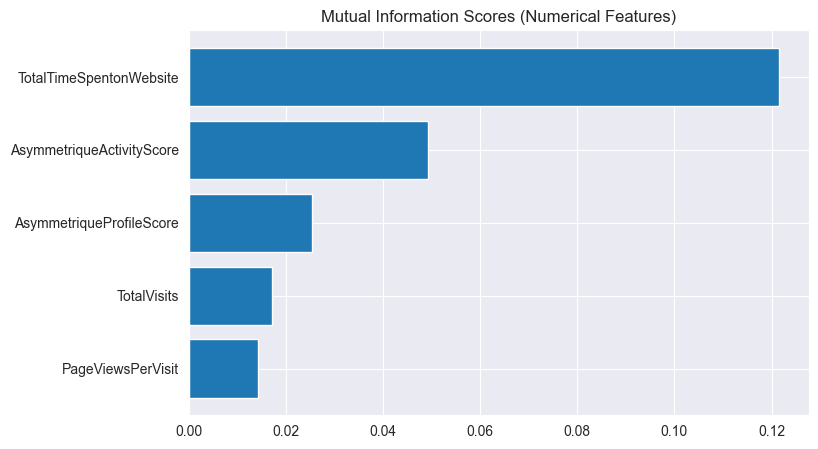

In [340]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores['NumFeatures'])

In [341]:
# Codificación de las columnas categóricas
from sklearn.feature_selection import mutual_info_classif

X = df_mutual.select_dtypes(include=['object'])
y = df_mutual['Converted']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

mi_scores['CatFeatures'] = mutual_info_classif(X, y)
mi_scores['CatFeatures'] = pd.Series(mi_scores['CatFeatures'], name="MI Scores", index=X.columns)
mi_scores['CatFeatures'] = mi_scores['CatFeatures'].sort_values(ascending=False)
mi_scores['CatFeatures']

Tags                                     0.204219
LeadQuality                              0.106437
LastActivity                             0.096948
LeadProfile                              0.074149
LastNotableActivity                      0.071331
Whatisyourcurrentoccupation              0.061230
LeadSource                               0.060083
LeadOrigin                               0.058616
AsymmetriqueActivityIndex                0.015729
City                                     0.013879
DoNotEmail                               0.012239
Specialization                           0.011462
NewspaperArticle                         0.008694
Newspaper                                0.007572
HowdidyouhearaboutXEducation             0.006196
Search                                   0.006192
Whatmattersmosttoyouinchoosingacourse    0.004707
AfreecopyofMasteringTheInterview         0.002071
Country                                  0.001883
AsymmetriqueProfileIndex                 0.001520


In [342]:
df_mutual.select_dtypes(include=['object']).head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,LastActivity,Country,Specialization,HowdidyouhearaboutXEducation,Whatisyourcurrentoccupation,Whatmattersmosttoyouinchoosingacourse,...,DigitalAdvertisement,ThroughRecommendations,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AfreecopyofMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,...,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,...,No,No,Ringing,Might be,Select,Select,02.Medium,02.Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,...,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,...,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


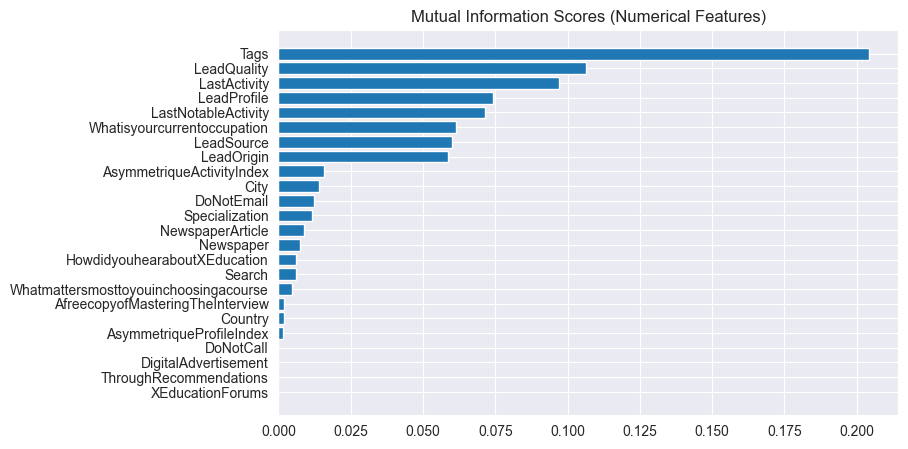

In [343]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores['CatFeatures'])

Vamos a crear un modelo base para comparar la importancia de las variables con la información mutua.

In [344]:
# One Hot Encoding de las columnas categóricas poque no hay mucha cardinalidad
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_mutual[categorical_cols])

# Convertimos el resultado a un DataFrame de Pandas
encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Unimos el DataFrame original con el DataFrame de las columnas categóricas codificadas
df_encoded = pd.concat([df_mutual, encoded], axis=1)

# Eliminamos las columnas categóricas originales
df_encoded = df_encoded.drop(columns=categorical_cols, axis=1)

df_encoded.head()

,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,AsymmetriqueActivityScore,AsymmetriqueProfileScore,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,15.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,5.0,674,2.5,15.0,15.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2.0,1532,2.0,14.0,20.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,305,1.0,13.0,17.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2.0,1428,1.0,15.0,18.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [345]:
# Modelo base
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = df_encoded.drop('Converted', axis=1)
y = df_encoded['Converted']

model = RandomForestClassifier(criterion="gini", random_state=42)
model_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Modelo base: {model_score.mean()}")

Modelo base: 0.9261904761904762


In [346]:
models_scores = {}

In [347]:
models_scores['Modelo Base'] = model_score.mean()

Ahora veremos si eliminando las columnas con baja correlación con la variable objetivo, el modelo mejora.

In [348]:
num_features_to_drop = mi_scores['NumFeatures'][mi_scores['NumFeatures'] < 0.05].index.tolist()
cat_features_to_drop = mi_scores['CatFeatures'][mi_scores['CatFeatures'] < 0.05].index.tolist()
features_to_drop = num_features_to_drop + cat_features_to_drop
df_mutual_borrado = df_mutual.drop(columns=features_to_drop)

In [349]:
df_mutual_borrado.head()

,LeadOrigin,LeadSource,Converted,TotalTimeSpentonWebsite,LastActivity,Whatisyourcurrentoccupation,Tags,LeadQuality,LeadProfile,LastNotableActivity
0,API,Olark Chat,0,0,Page Visited on Website,Unemployed,Interested in other courses,Low in Relevance,Select,Modified
1,API,Organic Search,0,674,Email Opened,Unemployed,Ringing,Might be,Select,Email Opened
2,Landing Page Submission,Direct Traffic,1,1532,Email Opened,Student,Will revert after reading the email,Might be,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,0,305,Unreachable,Unemployed,Ringing,Not Sure,Select,Modified
4,Landing Page Submission,Google,1,1428,Converted to Lead,Unemployed,Will revert after reading the email,Might be,Select,Modified


In [350]:
# One Hot Encoding de las columnas categóricas
categorical_cols = df_mutual_borrado.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_mutual_borrado[categorical_cols])

# Convertimos el resultado a un DataFrame de Pandas
encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Unimos el DataFrame original con el DataFrame de las columnas categóricas codificadas
df_encoded_2 = pd.concat([df_mutual_borrado, encoded], axis=1)

# Eliminamos las columnas categóricas originales
df_encoded_2 = df_encoded_2.drop(columns=categorical_cols, axis=1)

df_encoded_2.head()

,Converted,TotalTimeSpentonWebsite,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1532,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,305,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1428,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
# Modelo con columnas seleccionadas
X = df_encoded_2.drop('Converted', axis=1)
y = df_encoded_2['Converted']

model = RandomForestClassifier(criterion="gini", random_state=42)
model_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Modelo con columnas seleccionadas: {model_score.mean()}")

Modelo con columnas seleccionadas: 0.9


In [352]:
models_scores['Modelo con columnas seleccionadas'] = model_score.mean()

Como podemos ver, el modelo ha empeorado al eliminar las columnas con baja correlación con la variable objetivo. Por lo tanto, no utilizaremos este dataset para entrenar el modelo.

In [353]:
df_tratado = df_mutual.copy()
df_tratado.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,...,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,AfreecopyofMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,Might be,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


## 3. Entrenamiento del modelo y evaluación

In [354]:
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

columns = df_mutual.columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), df_mutual.select_dtypes(include=['object']).columns),
        ('standard', StandardScaler(), ['TotalTimeSpentonWebsite'])
    ],
    remainder='passthrough'
)

In [355]:
df_tratado.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,...,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,AfreecopyofMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,Might be,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [356]:
X.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [357]:
# División del dataset en train y test
X = df_tratado.drop('Converted', axis=1)
y = df_tratado['Converted']

In [358]:
X_preprocessed = preprocessor.fit_transform(X)

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7392, 208) (1848, 208)


In [360]:
df_tratado.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,...,Tags,LeadQuality,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,AfreecopyofMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,Might be,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [361]:
# Diccionario de modelos
modelos = {
    'Regresión Logística': LogisticRegression(max_iter=200),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Entrenamiento y evaluación de modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nombre] = {'Accuracy': accuracy}
    print(f"{nombre} - Accuracy: {accuracy:.4f}")

# Mostrar resultados finales
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

# Selección del mejor modelo
mejor_modelo = df_resultados['Accuracy'].idxmax()
print(
    f"El mejor modelo es: {mejor_modelo} con un Accuracy de {df_resultados.loc[mejor_modelo, 'Accuracy']:.4f}")


Regresión Logística - Accuracy: 0.9269


C:\Users\sergi\Documents\Estudios\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Árbol de Decisión - Accuracy: 0.8945
Random Forest - Accuracy: 0.9318
Gradient Boosting - Accuracy: 0.9313
                     Accuracy
Regresión Logística  0.926948
Árbol de Decisión    0.894481
Random Forest        0.931818
Gradient Boosting    0.931277
El mejor modelo es: Random Forest con un Accuracy de 0.9318


In [362]:
# Entrenamiento del mejor modelo
mejor_modelo = GradientBoostingClassifier()
mejor_modelo.fit(X_train, y_train)

# Predicciones
y_pred = mejor_modelo.predict(X_test)
y_pred_proba = mejor_modelo.predict_proba(X_test)[:, 1]

# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1107
           1       0.93      0.89      0.91       741

    accuracy                           0.93      1848
   macro avg       0.93      0.92      0.93      1848
weighted avg       0.93      0.93      0.93      1848



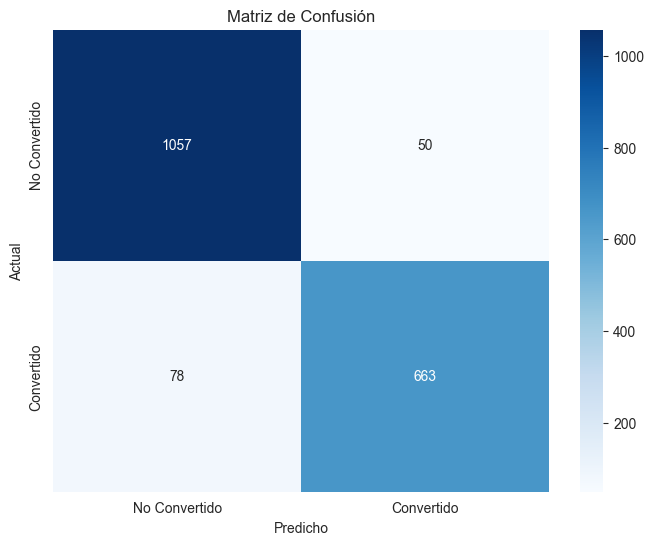

In [363]:
# Plot Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Convertido', 'Convertido'],
            yticklabels=['No Convertido', 'Convertido'])
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

## 4. Despliegue del modelo

In [372]:
# Guardar el modelo y el preprocesador
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(mejor_modelo, file)
    pickle.dump(preprocessor, file)
    pickle.dump(df_mutual.columns, file)

In [380]:
# tipo de dato de las columnas
df_mutual.select_dtypes(exclude=['object']).dtypes

Converted                      int64
TotalVisits                  float64
TotalTimeSpentonWebsite        int64
PageViewsPerVisit            float64
AsymmetriqueActivityScore    float64
AsymmetriqueProfileScore     float64
dtype: object